# 3. MediaPipeHandのサンプル

## ライブラリのインポート

In [1]:
# 必要なライブラリをインポートします
import cv2
import mediapipe as mp

## 3-1. モデルの読み込み

In [2]:
# 手検出のソリューションを読み込みます
mp_hands = mp.solutions.hands
# 最低限の検出信頼度と追跡信頼度はそれぞれ0.5（50%）に設定
hands = mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5)
# withを使用する場合
#with mp_hands.Hands(min_detection_confidence=0.5, min_tracking_confidence=0.5) as hands:

## 3-2. 画像にランドマークを描画するための初期化

In [3]:
# MediaPipeの描画ユーティリティを初期化
mp_drawing = mp.solutions.drawing_utils
# 今回はdrawing_specを使用しない
# drawing_spec = mp_drawing.DrawingSpec(thickness=1, circle_radius=1)  # 描画の設定（線の太さ、円の半径）

## 3-3. 画像の読み込み

In [4]:
# 読み込む画像ファイルのパス
image_path = 'hand_sample1.jpg'
# 画像を読み込む
image = cv2.imread(image_path)

In [5]:
# 画像を表示（OpenCV、Kernelが再起動する場合は実行しない）
cv2.imshow('MediaPipe Hands', image)
cv2.waitKey(0)                   # キーが押されるまでウィンドウを表示
cv2.destroyAllWindows()          # ウィンドウを閉じる

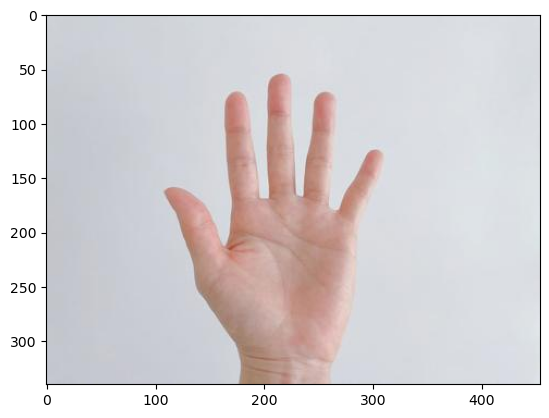

In [6]:
# 画像の表示（Matplotlib）
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

## 3-4. 画像をRGBに変換

In [7]:
# 画像をRGB形式に変換（MediaPipeはBGRではなくRGBで処理する）
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## 3-5. 画像を処理（手の検出）

In [8]:
# 手の検出を行います
results = hands.process(image_rgb)

In [9]:
# ランドマークの検出結果
print(results.multi_hand_landmarks)

[landmark {
  x: 0.4960205554962158
  y: 0.9099383354187012
  z: 5.349709226720734e-07
}
landmark {
  x: 0.3959636688232422
  y: 0.8390076756477356
  z: -0.042563606053590775
}
landmark {
  x: 0.33613502979278564
  y: 0.7011594772338867
  z: -0.053891871124506
}
landmark {
  x: 0.3096681237220764
  y: 0.578294575214386
  z: -0.061480674892663956
}
landmark {
  x: 0.2727622985839844
  y: 0.49452343583106995
  z: -0.06806474179029465
}
landmark {
  x: 0.41638875007629395
  y: 0.5547640323638916
  z: -0.012471702881157398
}
landmark {
  x: 0.3993493318557739
  y: 0.4094786047935486
  z: -0.037113506346940994
}
landmark {
  x: 0.39166781306266785
  y: 0.3180965781211853
  z: -0.061485446989536285
}
landmark {
  x: 0.3899790048599243
  y: 0.2405267357826233
  z: -0.0800512507557869
}
landmark {
  x: 0.4821837544441223
  y: 0.5406522750854492
  z: -0.01335714478045702
}
landmark {
  x: 0.4803868532180786
  y: 0.38306230306625366
  z: -0.033741991966962814
}
landmark {
  x: 0.478469580411911


In [10]:
# 左右の手のどちらか
print(results.multi_handedness)

[classification {
  index: 1
  score: 0.9321439862251282
  label: "Right"
}
]


## 3-6. ランドマークが検出された場所に描画

In [11]:
# 手が検出された場合
if results.multi_hand_landmarks:
    # 検出されたすべての手について
    for hand_landmarks in results.multi_hand_landmarks:
        # 手のランドマーク（指の関節部分など）と、それらをつなぐ線を描画します
        mp_drawing.draw_landmarks(
            image = image, 
            landmark_list = hand_landmarks,
            connections = mp_hands.HAND_CONNECTIONS) #drawing_specはデフォルト値を使用

## 3-7. 画像を表示

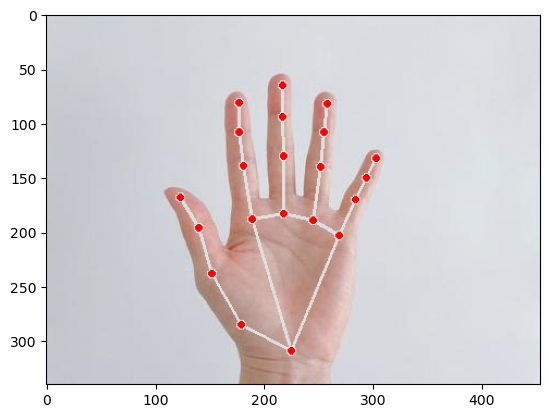

In [12]:
# 画像を表示（OpenCV、別ウインドウ）
cv2.imshow('MediaPipe FaceMesh', image)
cv2.waitKey(0)                   # キーが押されるまでウィンドウを表示
cv2.destroyAllWindows()          # ウィンドウを閉じる
# 画像を表示（matplotlib）
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()

# 4. PyAutoGUI

## 4-3. PyAutoGUIのサンプル動作確認

### 4-3-1. 事前準備

In [13]:
# 必要なライブラリをインポートします
import pyautogui

### 4-3-2. マウスの移動操作

In [15]:
# マウスを移動
pyautogui.moveTo(900, 500) #自分の画面に合わせて変更してみる

### 4-3-3. メッセージウインドウの操作

In [16]:
# アラートの表示
pyautogui.alert(text='text', title='title', button='OK')
pyautogui.confirm(text='', title='', buttons=['OK', 'Cancel']) #ボタンが2つの確認ウインドウを表示します。
pyautogui.prompt(text='', title='' , default='') #テキストを入力し、OKとキャンセルのボタンが使用できるプロンプトウインドウを表示します。

''

In [20]:
# 確認の表示
pyautogui.confirm(text='text', title='title', buttons=['OK', 'Cancel'])

'OK'

In [18]:
# 入力プロンプトの表示
pyautogui.prompt(text='text', title='title' , default='テキストを入力してください')

'jj'

### 4-3-4. スクリーンショットを撮る操作

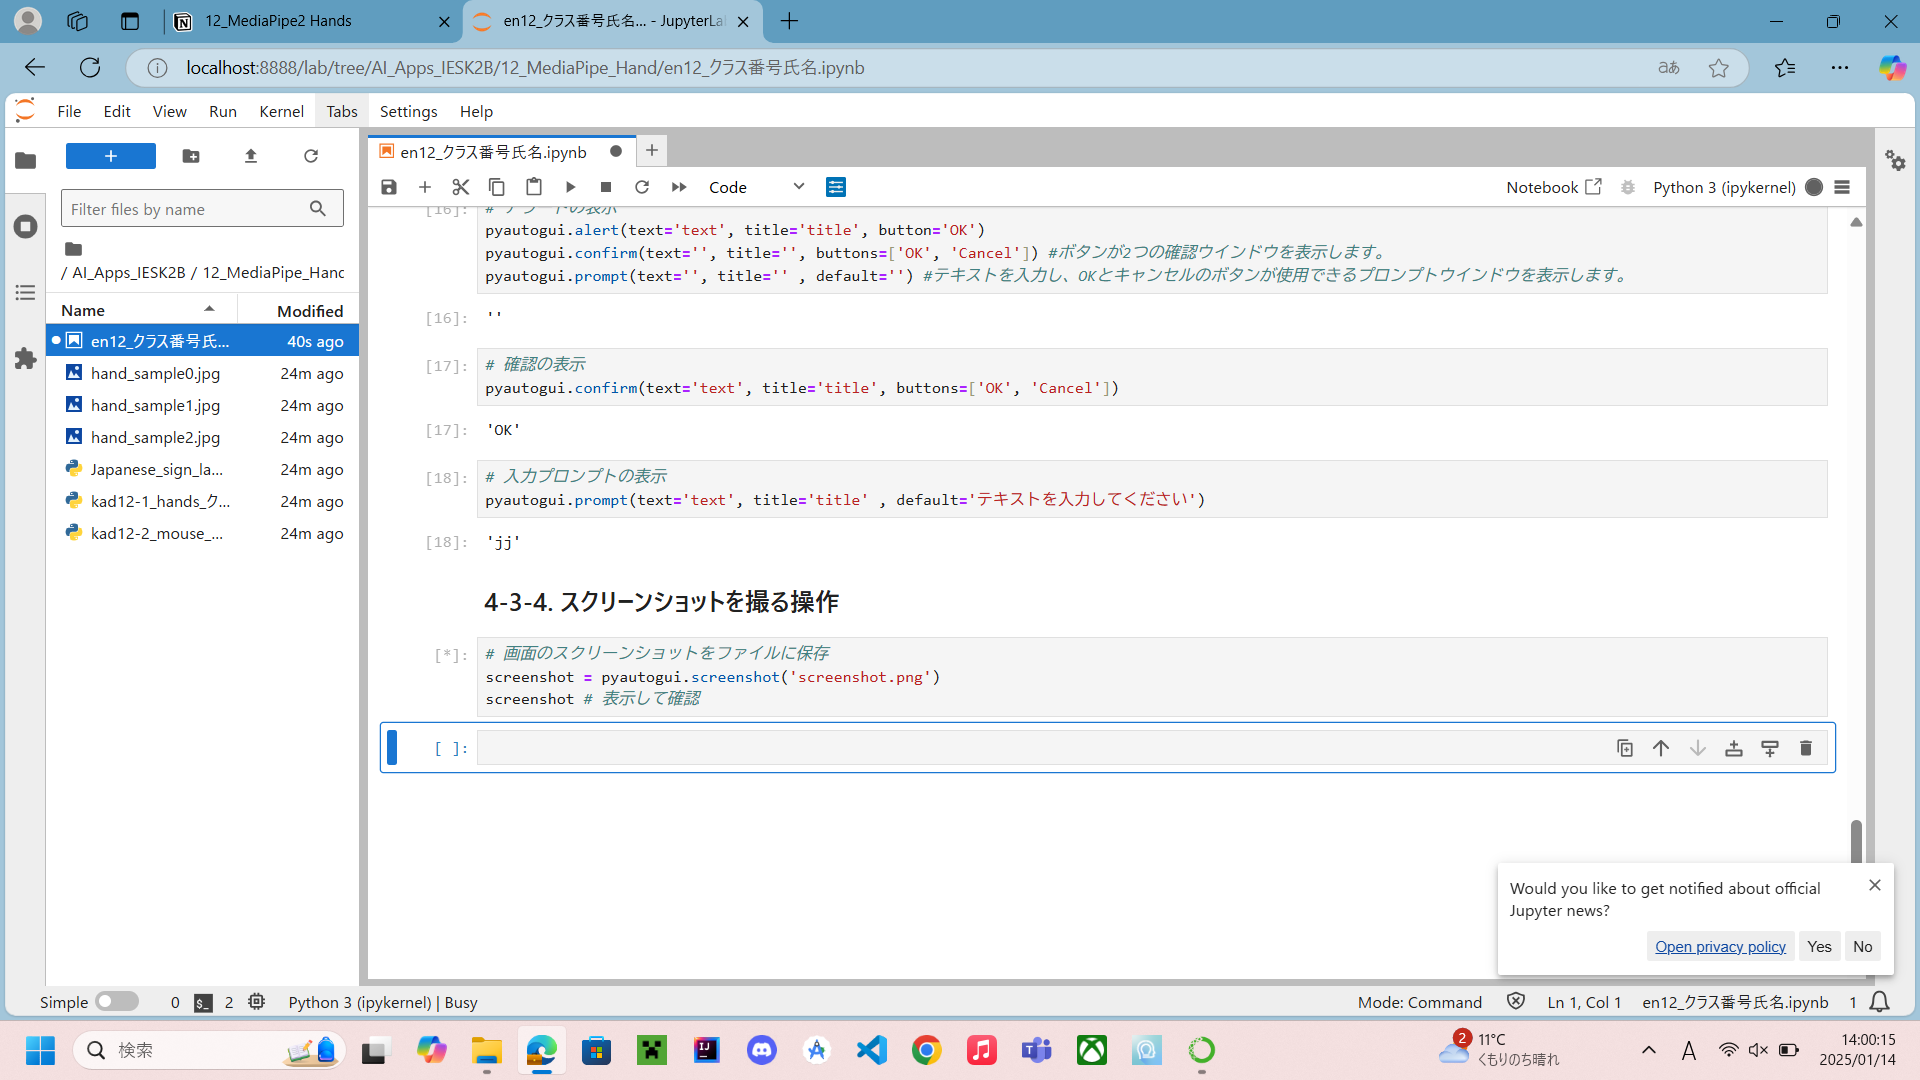

In [19]:
# 画面のスクリーンショットをファイルに保存
screenshot = pyautogui.screenshot('screenshot.png')
screenshot # 表示して確認